In [1]:
# Step 1: Import necessary libraries and set up the environment
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add the scripts directory to the path to access Mode_training.py
sys.path.append(os.path.abspath('../scripts'))

# Import functions from the script
from Model_training import prepare_data, define_and_train_models



In [2]:
# Step 2: Prepare the data
(X_train_cc, X_test_cc, y_train_cc, y_test_cc), (X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud) = prepare_data()

# Step 3: Define and train models
results = define_and_train_models(X_train_cc, y_train_cc, X_test_cc, y_test_cc,
                                   X_train_fraud, y_train_fraud, X_test_fraud, y_test_fraud)

# Step 4: Create a DataFrame for results
accuracy_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Credit Card Accuracy': [metrics['Credit Card Accuracy'] for metrics in results.values()],
    'Fraud Accuracy': [metrics['Fraud Accuracy'] for metrics in results.values()]
})

# Step 5: Display the DataFrame
print(accuracy_df)


Training Logistic Regression...
Accuracy (Credit Card Data): 0.9990695551420246
Accuracy (Fraud Data): 0.9057009562253913

Training Decision Tree...
Accuracy (Credit Card Data): 0.9990519995786665
Accuracy (Fraud Data): 0.8914733811997485

Training Random Forest...
Accuracy (Credit Card Data): 0.9995786664794073
Accuracy (Fraud Data): 0.9366045726764385

Training Gradient Boosting...
Accuracy (Credit Card Data): 0.9989466661985184
Accuracy (Fraud Data): 0.9056347814578302

Training Multi-Layer Perceptron...
Accuracy (Credit Card Data): 0.9995084442259752
Accuracy (Fraud Data): 0.9057009562253913

                    Model  Credit Card Accuracy  Fraud Accuracy
0     Logistic Regression              0.999070        0.905701
1           Decision Tree              0.999052        0.891473
2           Random Forest              0.999579        0.936605
3       Gradient Boosting              0.998947        0.905635
4  Multi-Layer Perceptron              0.999508        0.905701


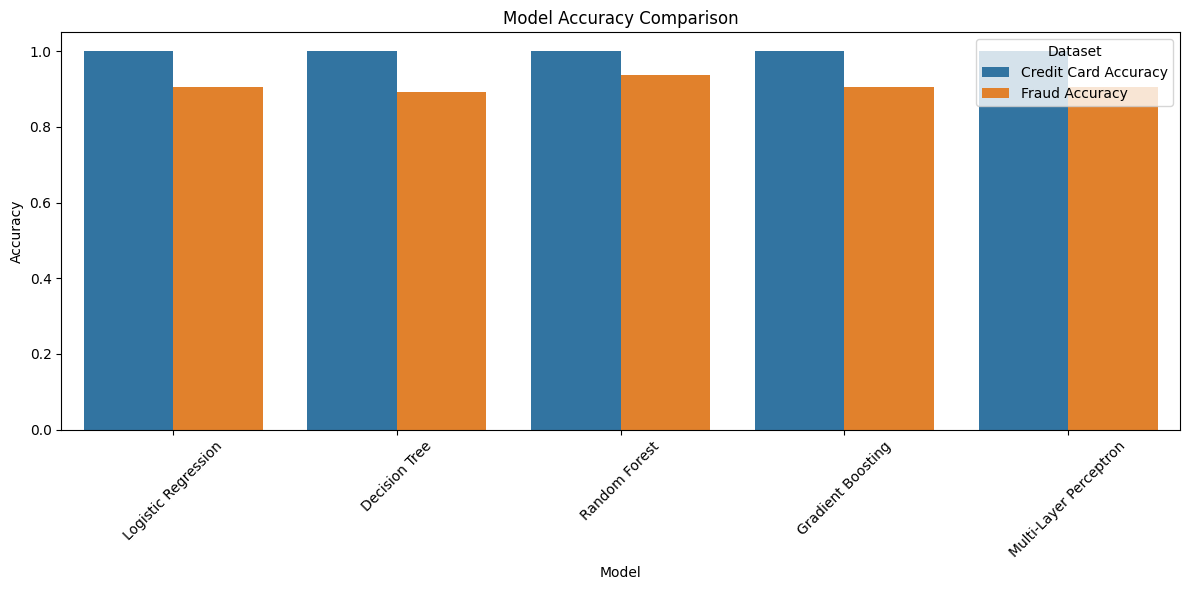

In [3]:

# Step 6: Visualization of model accuracies
plt.figure(figsize=(12, 6))
accuracy_df_melted = accuracy_df.melt(id_vars='Model', 
                                        value_vars=['Credit Card Accuracy', 'Fraud Accuracy'], 
                                        var_name='Dataset', 
                                        value_name='Accuracy')

sns.barplot(data=accuracy_df_melted, x='Model', y='Accuracy', hue='Dataset')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()
